**📋 The Scenario: "Is it a Good Year?"**
- Kamu adalah seorang Analis Data Junior di sebuah firma investasi. Bos kamu memberikan data historis harga saham Amazon dari tahun 1997. Misi Kamu:
- Siapkan data agar bisa dianalisis berdasarkan waktu (Tahun/Bulan).
- Cari tahu tahun mana yang memberikan keuntungan ("Cuan") rata-rata terbesar.
- Deteksi hari-hari "berdarah" (ketika harga jatuh parah).

---

**Step 1: Load & Inspect**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


df_amazon = pd.read_csv('Amazon_stock_data.csv')

# Cek tipe data
print(df_amazon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7221 entries, 0 to 7220
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7221 non-null   object 
 1   Close   7221 non-null   float64
 2   High    7221 non-null   float64
 3   Low     7221 non-null   float64
 4   Open    7221 non-null   float64
 5   Volume  7221 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 338.6+ KB
None


In [25]:
display(df_amazon.head())

,Date,Close,High,Low,Open,Volume
0,1997-05-15,0.097917,0.125000,0.096354,0.121875,1443120000
1,1997-05-16,0.086458,0.098958,0.085417,0.098438,294000000
2,1997-05-19,0.085417,0.088542,0.081250,0.088021,122136000
3,1997-05-20,0.081771,0.087500,0.081771,0.086458,109344000
4,1997-05-21,0.071354,0.082292,0.068750,0.081771,377064000


---

**Step 2: The Challenge (Time Series Edition)**

In [26]:
# Fixing the Time

df_amazon['Date'] = pd.to_datetime(df_amazon['Date'])
df_amazon = df_amazon.set_index('Date')
print(df_amazon.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7221 entries, 1997-05-15 to 2026-01-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   7221 non-null   float64
 1   High    7221 non-null   float64
 2   Low     7221 non-null   float64
 3   Open    7221 non-null   float64
 4   Volume  7221 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 338.5 KB
None


In [27]:
# Engineering Growth (Manipulasi)

# we want to know fluktuasi harian =  Persentase perubahan harga penutupan harian)
df_amazon['Daily_Return'] = df_amazon['Close'].pct_change().round(2)
# df_amazon['Daily_Return_Pct'] = df_amazon['Close'].pct_change() * 100

display(df_amazon.head())

,Close,High,Low,Open,Volume,Daily_Return
Date,,,,,,
1997-05-15,0.097917,0.125000,0.096354,0.121875,1443120000,NaN
1997-05-16,0.086458,0.098958,0.085417,0.098438,294000000,-0.12
1997-05-19,0.085417,0.088542,0.081250,0.088021,122136000,-0.01
1997-05-20,0.081771,0.087500,0.081771,0.086458,109344000,-0.04
1997-05-21,0.071354,0.082292,0.068750,0.081771,377064000,-0.13


In [31]:
# The Golden Year (Agregasi Waktu)
# Hitung rata-rata harga Close per Tahun
# metode Resampling (ini versi .groupby khusus waktu).
df_amazon.resample('YE')['Close'].mean().sort_values(ascending=False).round(2)

Date
2026-12-31    238.93
2025-12-31    217.67
2024-12-31    184.63
2021-12-31    167.19
2020-12-31    134.04
2022-12-31    126.10
2023-12-31    121.37
2019-12-31     89.46
2018-12-31     82.09
2017-12-31     48.41
2016-12-31     34.98
2015-12-31     23.91
2014-12-31     16.63
2013-12-31     14.90
2012-12-31     11.02
2011-12-31      9.83
2010-12-31      6.96
2009-12-31      4.36
2008-12-31      3.49
1999-12-31      3.45
2007-12-31      3.36
2000-12-31      2.33
2004-12-31      2.18
2005-12-31      1.99
2003-12-31      1.89
2006-12-31      1.80
2002-12-31      0.82
1998-12-31      0.78
2001-12-31      0.61
1997-12-31      0.16
Name: Close, dtype: float64

**2026* ATH*

In [46]:
# Crash Detector (Filtering)
# knowing bad day
mask = df_amazon[df_amazon['Daily_Return'] < -0.10]
mask

,Close,High,Low,Open,Volume,Daily_Return
Date,,,,,,
1997-05-16,0.086458,0.098958,0.085417,0.098438,294000000,-0.12
1997-05-21,0.071354,0.082292,0.068750,0.081771,377064000,-0.13
1997-07-11,0.114583,0.126042,0.110417,0.126042,210624000,-0.11
1997-09-15,0.154688,0.183854,0.152604,0.183333,111672000,-0.16
1997-10-27,0.213542,0.250521,0.211458,0.240104,121824000,-0.15
1998-07-07,1.017708,1.197917,1.008333,1.191667,945036000,-0.12
1998-07-08,0.892708,0.991667,0.853125,0.932292,1166232000,-0.12
1998-08-28,0.882422,1.007292,0.860417,0.997917,780720000,-0.11
1998-08-31,0.697917,0.896875,0.692708,0.878646,820008000,-0.21


In [47]:
total_kejadian = len(mask)
total_kejadian

53

In [40]:
df_amazon.loc[df_amazon['Daily_Return'] < -0.10, ['Close', 'Daily_Return']]


,Close,Daily_Return
Date,,
1997-05-16,0.086458,-0.12
1997-05-21,0.071354,-0.13
1997-07-11,0.114583,-0.11
1997-09-15,0.154688,-0.16
1997-10-27,0.213542,-0.15
1998-07-07,1.017708,-0.12
1998-07-08,0.892708,-0.12
1998-08-28,0.882422,-0.11
1998-08-31,0.697917,-0.21


**53 total kejadian**

---
**Visual & Summary**

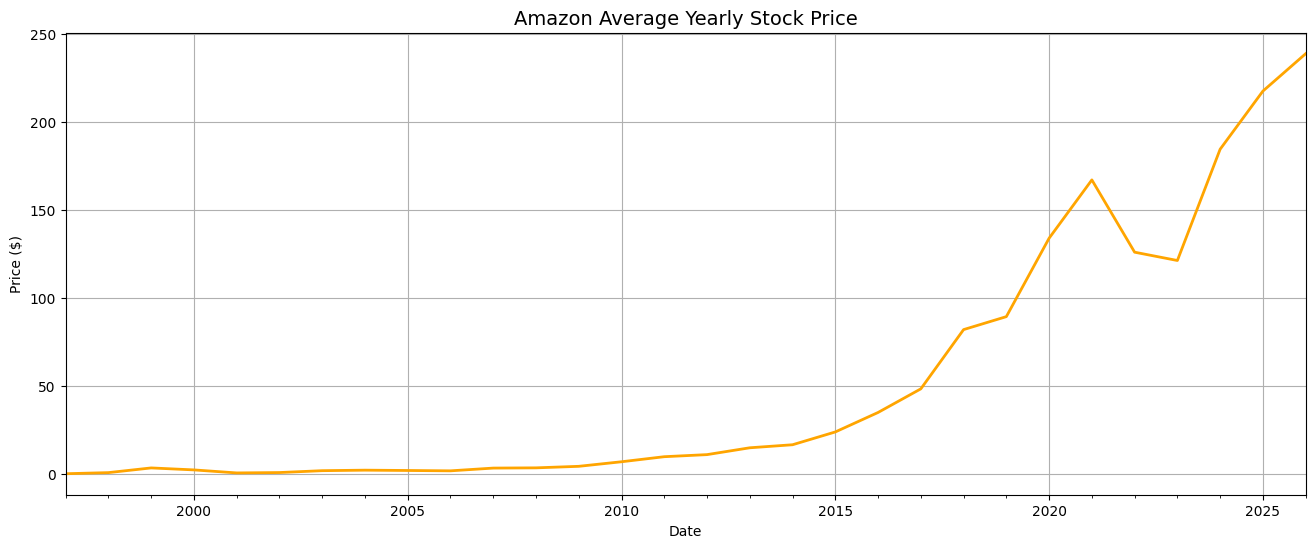

In [51]:
# Plotting Sederhana untuk Harga Penutupan Tahunan
yearly_close = df_amazon['Close'].resample('YE').mean()

plt.figure(figsize=(16, 6))
yearly_close.plot(color='orange', linewidth=2)
plt.title('Amazon Average Yearly Stock Price', fontsize=14)
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

**Which year had the highest average stock price, and how many times did the stock crash by more than 10% in a single day?**

**berdaskan hasil analisis data yang di ambil sejak 1997 - 2026 tahun dengan harga rata-rata tertinggi berada pada tahun 2026 dan 53 hari harga saham berada pada level terburuknya. meski demikian harga saham cenderung bergerak positif mengalami kenaikan dari tahun ke tahun ini artinya perusahaan dalam keadaan sehat. hari hari terburuk bisa disebabkan faktor eksternal bukan internal.**

**Based on the analysis from 1997 to 2026, the highest average stock price occurred in 2026. Although the stock experienced significant crashes on more than 50 occasions, the overall trend remains positive, indicating a healthy company trajectory. The sharp declines were likely driven by external market factors rather than internal issues."**

---
**Visualizing the Crashes**

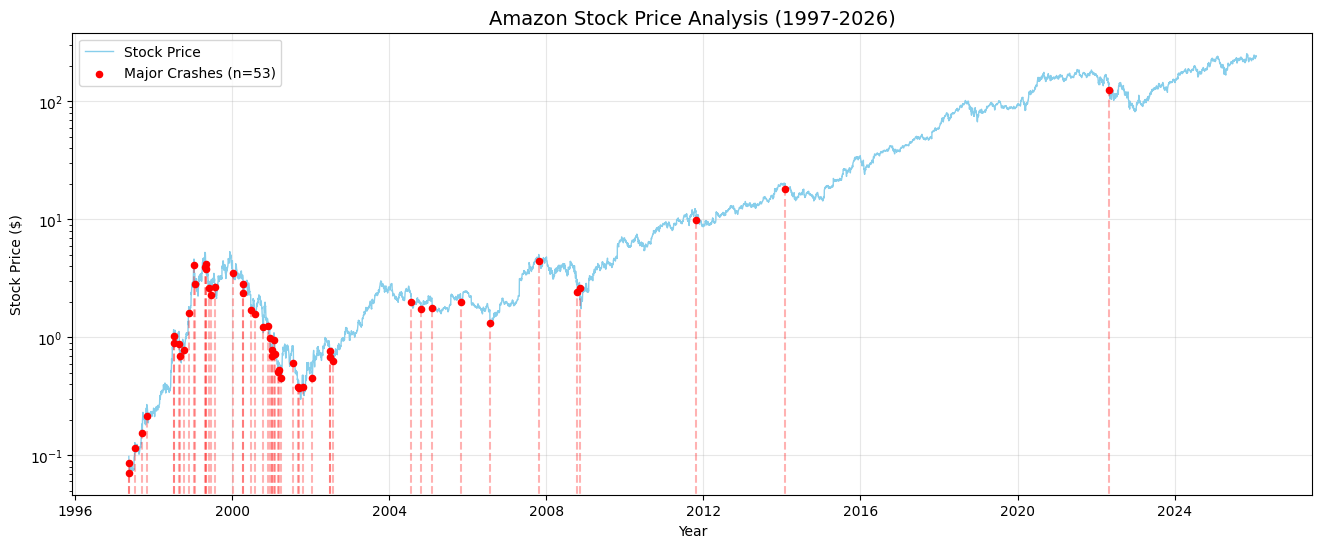

In [63]:

# Ambil data harga penutupan
price_data = df_amazon['Close']
# Ambil data tanggal-tanggal crash (penurunan > 10%)
crash_dates = df_amazon[df_amazon['Daily_Return'] < -0.10].index

# 2. Plotting
plt.figure(figsize=(16, 6))

# Garis Harga Saham (Biru)
plt.plot(price_data.index, price_data, label='Stock Price', color='skyblue', linewidth=1)

# Titik-titik Crash (Merah)
# ambil harga pada tanggal crash tsb
crash_prices = price_data.loc[crash_dates]
plt.scatter(crash_dates, crash_prices, color='red', label='Major Crashes (>10% Drop)', s=20, zorder=5)


plt.title('Amazon Stock Price Analysis (1997-2026)', fontsize=14)
plt.ylabel('Stock Price ($)')
plt.xlabel('Year')
plt.yscale('log')
plt.vlines(crash_dates, ymin=0, ymax=crash_prices, color='red', alpha=0.3, linestyle='--')
plt.legend(labels=[f'Stock Price', f'Major Crashes (n={len(crash_dates)})'])
plt.grid(True, alpha=0.3)

plt.show()

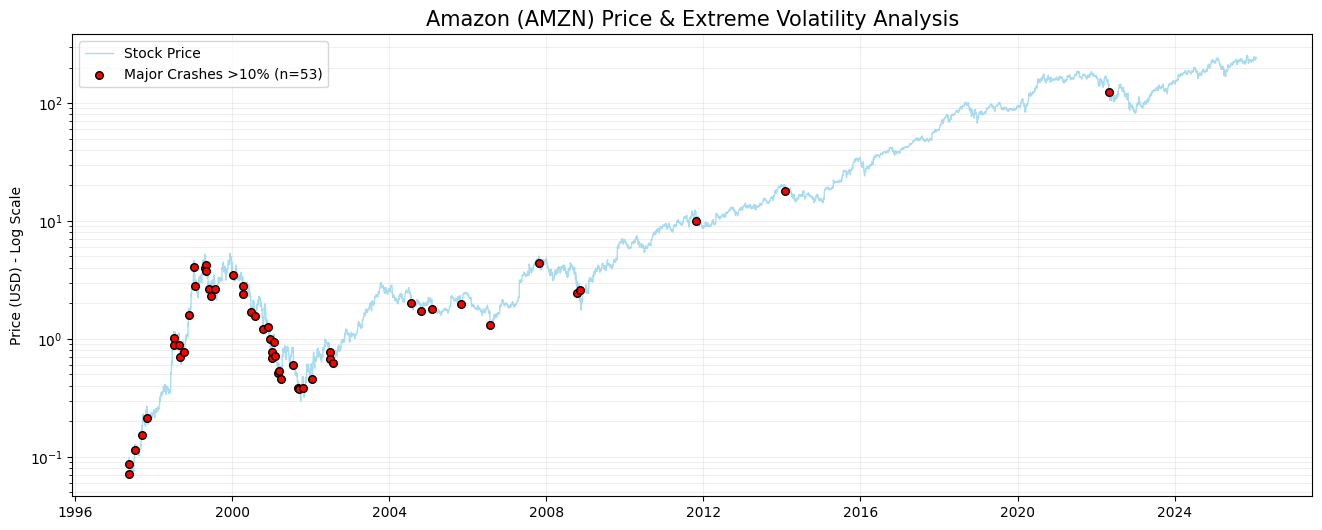

In [65]:
plt.figure(figsize=(16, 6))

# 1. Plot Utama
plt.plot(price_data.index, price_data, label='Stock Price', color='skyblue', linewidth=1, alpha=0.7)

# 2. Plot Titik Crash (Hasil "Sub-Query" kamu)
plt.scatter(crash_dates, price_data.loc[crash_dates], 
            color='red', 
            label=f'Major Crashes >10% (n={len(crash_dates)})', 
            s=30, edgecolors='black', zorder=5)

plt.title('Amazon (AMZN) Price & Extreme Volatility Analysis', fontsize=15)
plt.yscale('log') # Menggunakan skala logaritmik agar data tahun 90-an terlihat
plt.ylabel('Price (USD) - Log Scale')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()

plt.show()


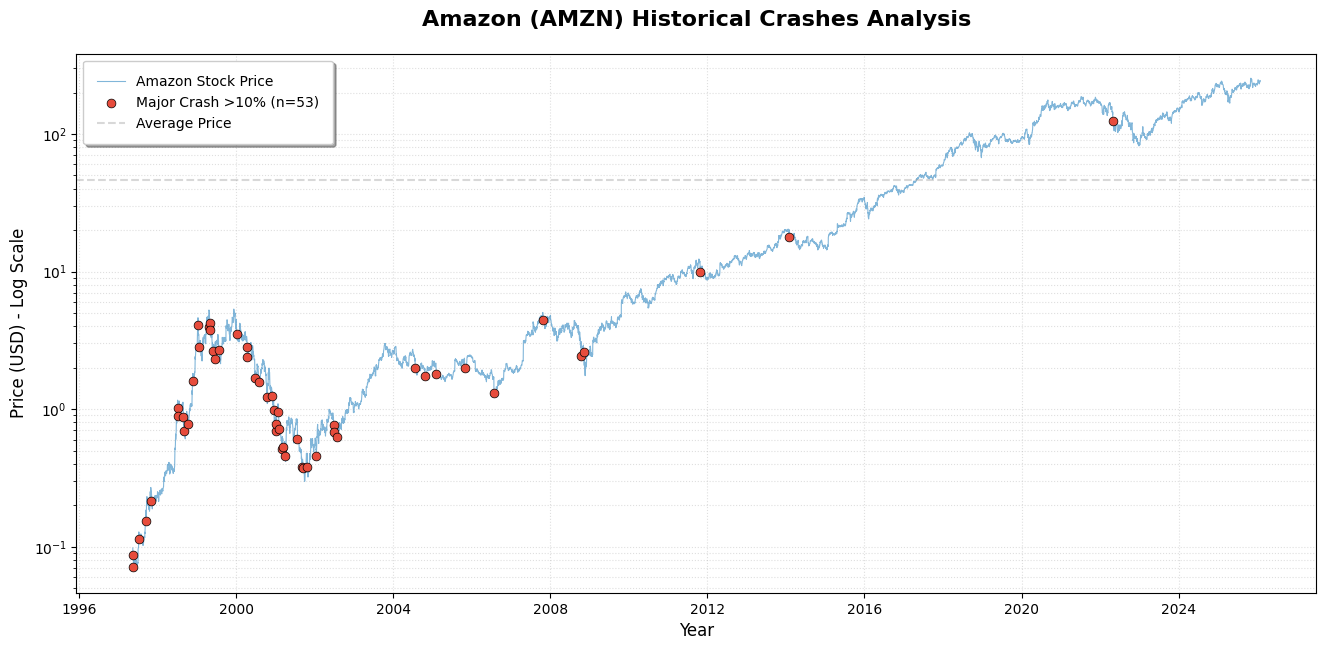

In [66]:
plt.figure(figsize=(16, 7))

# 1. Garis Harga (Dibuat lebih tipis & transparan agar titik merah menonjol)
plt.plot(price_data.index, price_data, 
         label='Amazon Stock Price', 
         color='#2E86C1',      # Biru yang lebih solid
         linewidth=0.8,        # Garis agak tipis
         alpha=0.6)            # Sedikit transparan

# 2. Titik Crash (Dibuat lebih besar dengan garis tepi)
plt.scatter(crash_dates, price_data.loc[crash_dates], 
            color='#E74C3C',    # Merah cerah
            label=f'Major Crash >10% (n={len(crash_dates)})', 
            s=40,               # Ukuran titik lebih besar
            edgecolor='black',  # Kasih pinggiran hitam biar tegas
            linewidth=0.5,
            zorder=5)           # Memastikan titik ada di depan garis

# Tambahan: Garis rata-rata (opsional, buat pembanding)
avg_price = price_data.mean()
plt.axhline(avg_price, color='gray', linestyle='--', alpha=0.3, label='Average Price')

# Styling
plt.title('Amazon (AMZN) Historical Crashes Analysis', fontsize=16, fontweight='bold', pad=20)
plt.yscale('log')
plt.ylabel('Price (USD) - Log Scale', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(frameon=True, shadow=True, borderpad=1)
plt.grid(True, which="both", ls=":", alpha=0.4)

plt.show()


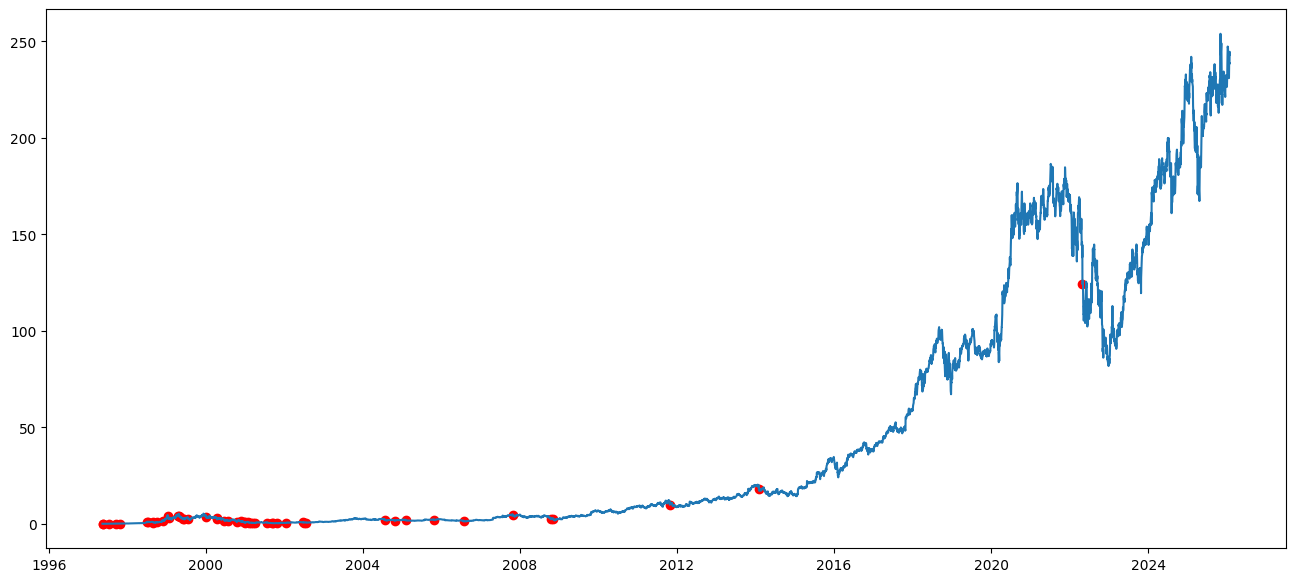

In [70]:

# intinya
plt.figure(figsize=(16, 7))
# 1. Garis utamanya (Otomatis nyambung karena pakai .plot)
plt.plot(price_data.index, price_data)

# 2. Titik-titik di atas garis (Hanya muncul di tanggal tertentu karena pakai .scatter)
plt.scatter(crash_dates, crash_prices, color='red')
plt.show()